In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import re
import folium

In [88]:
coffee_shops = pd.read_csv('data/details_data_raw.csv', index_col=0)

#### Data Exploration

In [89]:
coffee_shops.head()

,formattedAddress,location,rating,businessStatus,userRatingCount,displayName,primaryTypeDisplayName,priceRange,websiteUri
0,"C. 27 117, San Lorenzo, Umán, 97390 Umán, Yuc....","{'latitude': 20.894740499999997, 'longitude': ...",5.0,OPERATIONAL,2.0,"{'text': 'Frappe shop suc san lorenzo', 'langu...","{'text': 'Cafe', 'languageCode': 'en-US'}",NaN,NaN
1,"C. 27 131, San Lorenzo, Umán, 97390 Umán, Yuc....","{'latitude': 20.8945503, 'longitude': -89.732288}",3.0,OPERATIONAL,5.0,"{'text': 'Panucheria Doña Yolí', 'languageCode...","{'text': 'Coffee Shop', 'languageCode': 'en-US'}",NaN,NaN
2,"C. 20, Umán, 97390 Umán, Yuc., Mexico","{'latitude': 20.8915676, 'longitude': -89.7302...",5.0,OPERATIONAL,1.0,"{'text': 'Taquería mi Angel', 'languageCode': ...","{'text': 'Coffee Shop', 'languageCode': 'en-US'}",NaN,NaN
3,"Campeche-Mérida 11592, 97392 Mérida, Yuc., Mexico","{'latitude': 20.8941657, 'longitude': -89.6934...",NaN,OPERATIONAL,NaN,"{'text': 'Barra andatti Gourmet Santa Cruz', '...","{'text': 'Coffee Shop', 'languageCode': 'en-US'}",NaN,NaN
4,"C. 40a 823c, Piedra de Agua, 97392 Umán, Yuc.,...","{'latitude': 20.9021989, 'longitude': -89.6958...",NaN,OPERATIONAL,NaN,"{'text': 'Antojeria', 'languageCode': 'es'}","{'text': 'Coffee Shop', 'languageCode': 'en-US'}",NaN,NaN


In [90]:
coffee_shops.tail()

,formattedAddress,location,rating,businessStatus,userRatingCount,displayName,primaryTypeDisplayName,priceRange,websiteUri
743,97302 Calle 100-2 #140h Fraccionamiento las am...,"{'latitude': 21.080935099999998, 'longitude': ...",NaN,OPERATIONAL,NaN,"{'text': 'Espacio 11:11', 'languageCode': 'es'}","{'text': 'Cafe', 'languageCode': 'en-US'}",NaN,NaN
744,"C. 49-B 926, entre 112 y 108 A, Fraccionamient...","{'latitude': 21.0818943, 'longitude': -89.6616...",5.0,OPERATIONAL,10.0,"{'text': 'Frapplo', 'languageCode': 'es'}","{'text': 'Coffee Shop', 'languageCode': 'en-US'}","{'startPrice': {'currencyCode': 'MXN', 'units'...",https://www.instagram.com/frapplo_/
745,"C. 100-1 137, Fraccionamiento Las Américas 2, ...","{'latitude': 21.081186499999998, 'longitude': ...",5.0,OPERATIONAL,2.0,"{'text': 'Mejorar el futuro!', 'languageCode':...","{'text': 'Cafe', 'languageCode': 'en-US'}",NaN,NaN
746,"Carr. Mérida - Progreso, 97302 Xcanatún, Yuc.,...","{'latitude': 21.0814901, 'longitude': -89.6352...",4.3,OPERATIONAL,183.0,"{'text': 'Starbucks Carretera Progreso', 'lang...","{'text': 'Coffee Shop', 'languageCode': 'en-US'}","{'startPrice': {'currencyCode': 'MXN', 'units'...",NaN
747,"C. 21 entre 4, 97302 Chablekal, Yuc., Mexico","{'latitude': 21.091645099999997, 'longitude': ...",5.0,OPERATIONAL,1.0,"{'text': 'DRAGÓN SUSHI🐉', 'languageCode': 'es'}","{'text': 'Coffee Shop', 'languageCode': 'en-US'}",NaN,NaN


In [91]:
coffee_shops.shape

(748, 9)

In [92]:
coffee_shops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 747
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   formattedAddress        748 non-null    object 
 1   location                748 non-null    object 
 2   rating                  675 non-null    float64
 3   businessStatus          748 non-null    object 
 4   userRatingCount         675 non-null    float64
 5   displayName             748 non-null    object 
 6   primaryTypeDisplayName  748 non-null    object 
 7   priceRange              388 non-null    object 
 8   websiteUri              273 non-null    object 
dtypes: float64(2), object(7)
memory usage: 58.4+ KB


#### Data Cleaning

In [93]:
coffee_shops.duplicated().sum()

np.int64(0)

In [94]:
coffee_shops.apply(lambda col: col.dropna().duplicated().sum())

formattedAddress            6
location                    2
rating                    646
businessStatus            747
userRatingCount           433
displayName                13
primaryTypeDisplayName    725
priceRange                381
websiteUri                 13
dtype: int64

In [95]:
coffee_shops.drop_duplicates(subset='location', inplace=True)

In [96]:
coffee_shops.isnull().sum()

formattedAddress            0
location                    0
rating                     72
businessStatus              0
userRatingCount            72
displayName                 0
primaryTypeDisplayName      0
priceRange                358
websiteUri                473
dtype: int64

In [97]:
coffee_shops.dropna(subset='userRatingCount', inplace=True)

In [98]:
coffee_shops.drop(coffee_shops[coffee_shops['formattedAddress'].str.contains('kanasín', case=False)].index, inplace=True)
coffee_shops.drop(coffee_shops[coffee_shops['primaryTypeDisplayName'].str.contains('mexican', case=False)].index, inplace=True)
coffee_shops.drop(coffee_shops[coffee_shops['displayName'].str.contains('sushi|pasta', case=False)].index, inplace=True)
coffee_shops.reset_index(drop=True, inplace=True)

In [99]:
coffee_shops['location'] = coffee_shops['location'].apply(lambda s: ast.literal_eval(s) if type(s)==str else s)
coffee_shops['priceRange'] = coffee_shops['priceRange'].apply(lambda s: ast.literal_eval(s) if type(s)==str else s)

In [100]:
coffee_shops['displayName'] = coffee_shops['displayName'].apply(lambda s: ast.literal_eval(s)['text'] if type(s)==str else s)
coffee_shops['primaryTypeDisplayName'] = coffee_shops['primaryTypeDisplayName'].apply(lambda s: ast.literal_eval(s)['text'] if type(s)==str else s)

In [101]:
coffee_shops['postalCode'] = coffee_shops['formattedAddress'].apply(lambda s: int(re.search(r'\b97\d{3}\b', s).group(0)))

In [102]:
avgPrice = []

for price in coffee_shops['priceRange']:
    if type(price) == dict:
        avg = 0
        if 'startPrice' not in price:
            avg = int(price['endPrice']['units']) / 2
        elif 'endPrice' not in price:
            avg = int(price['startPrice']['units']) / 2
        else:
            avg = (int(price['startPrice']['units']) + int(price['endPrice']['units'])) / 2
        
        avgPrice.append(avg)
        
    else:
        avgPrice.append(np.nan)

coffee_shops['avgPrice'] = avgPrice

In [103]:
coffee_shops

,formattedAddress,location,rating,businessStatus,userRatingCount,displayName,primaryTypeDisplayName,priceRange,websiteUri,postalCode,avgPrice
0,"C. 27 117, San Lorenzo, Umán, 97390 Umán, Yuc....","{'latitude': 20.894740499999997, 'longitude': ...",5.0,OPERATIONAL,2.0,Frappe shop suc san lorenzo,Cafe,NaN,NaN,97390,NaN
1,"C. 27 131, San Lorenzo, Umán, 97390 Umán, Yuc....","{'latitude': 20.8945503, 'longitude': -89.732288}",3.0,OPERATIONAL,5.0,Panucheria Doña Yolí,Coffee Shop,NaN,NaN,97390,NaN
2,"C. 20, Umán, 97390 Umán, Yuc., Mexico","{'latitude': 20.8915676, 'longitude': -89.7302...",5.0,OPERATIONAL,1.0,Taquería mi Angel,Coffee Shop,NaN,NaN,97390,NaN
3,"97300 San Marcos Sustentable, 97300 Mérida, Yu...","{'latitude': 20.900779, 'longitude': -89.6664215}",5.0,OPERATIONAL,5.0,NIÑOS SANTOS CAFÉ GOURMET,Coffee Shop,NaN,NaN,97300,NaN
4,"97295 Merida, Yucatan, Mexico","{'latitude': 20.898615600000003, 'longitude': ...",4.5,OPERATIONAL,14.0,Moheno's Café,Cafe,NaN,NaN,97295,NaN
...,...,...,...,...,...,...,...,...,...,...,...
617,"Vega Del Mayab, 97347 Mérida, Yuc., Mexico","{'latitude': 21.0682236, 'longitude': -89.5534...",4.8,OPERATIONAL,72.0,"Chef Aslam Escobar, Castello banquetes, Cazuel...",Caterer,NaN,http://www.facebook.com/cazuelasmerida,97347,NaN
618,"C. 45D, 97302 Mérida, Yuc., Mexico","{'latitude': 21.089629799999997, 'longitude': ...",5.0,OPERATIONAL,7.0,La Sexta Foods,Restaurant,"{'startPrice': {'currencyCode': 'MXN', 'units'...",NaN,97302,50.5
619,"C. 49-B 926, entre 112 y 108 A, Fraccionamient...","{'latitude': 21.0818943, 'longitude': -89.6616...",5.0,OPERATIONAL,10.0,Frapplo,Coffee Shop,"{'startPrice': {'currencyCode': 'MXN', 'units'...",https://www.instagram.com/frapplo_/,97302,50.5
620,"C. 100-1 137, Fraccionamiento Las Américas 2, ...","{'latitude': 21.081186499999998, 'longitude': ...",5.0,OPERATIONAL,2.0,Mejorar el futuro!,Cafe,NaN,NaN,97302,NaN


#### Exploratory Data Analysis                                      


In [104]:
lat = [pos['latitude'] for pos in coffee_shops['location']]
lon = [pos['longitude'] for pos in coffee_shops['location']]

fig = px.density_map(lat=lat, lon=lon, zoom=11, width=1000, height=1000)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, coloraxis_showscale=False)

fig.show()

In [105]:
m = folium.Map(location=(20.96824772136504, -89.62413058864624), zoom_start=12)

m

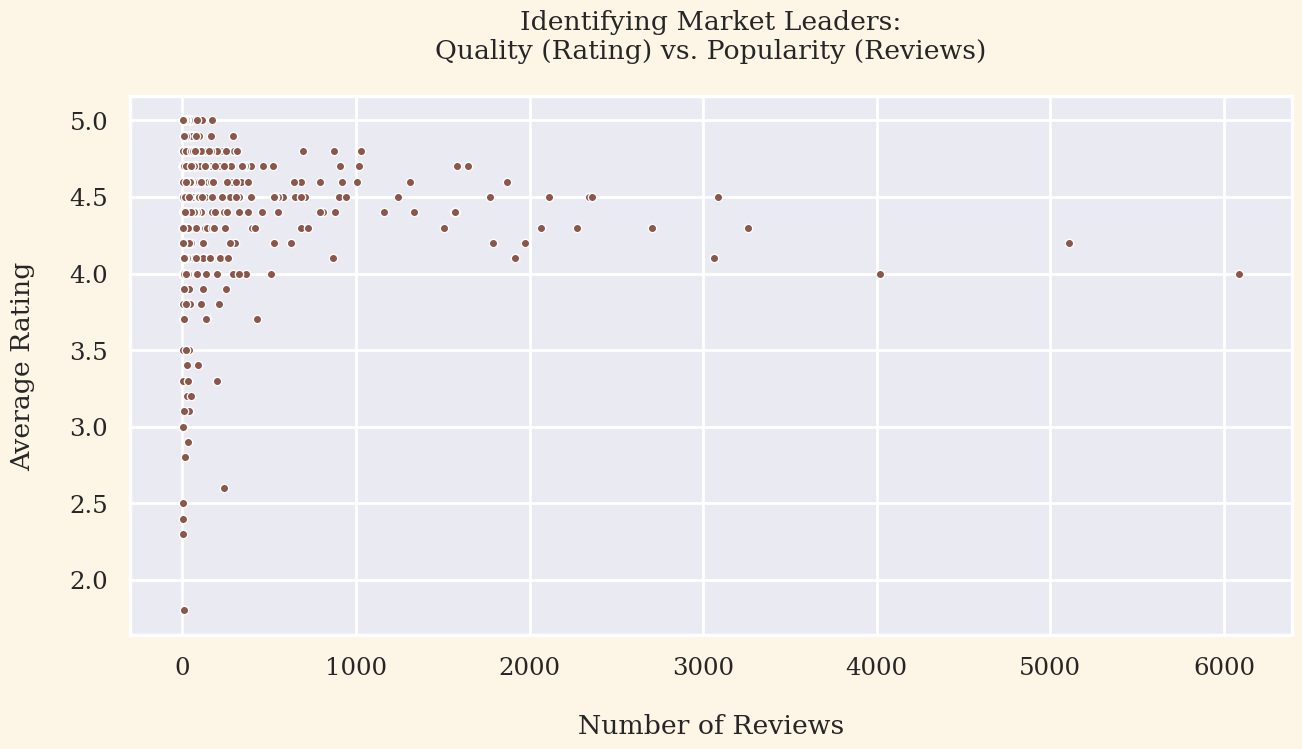

In [106]:
sns.set_theme(context='poster', font='serif', font_scale=0.8)

plt.figure(figsize=(15,7), facecolor='oldlace')
sns.scatterplot(x=coffee_shops['userRatingCount'], y=coffee_shops['rating'], c='tab:brown', marker='.')
plt.xlabel('\nNumber of Reviews')
plt.ylabel('Average Rating\n')
plt.title('Identifying Market Leaders:\nQuality (Rating) vs. Popularity (Reviews)\n')

plt.show()

In [107]:
best_coffee_shops = coffee_shops[(coffee_shops['rating'] >= 4.5) & (coffee_shops['userRatingCount'] >= 1000)].sort_values(by='rating', ascending=False)[['displayName', 'rating', 'userRatingCount', 'formattedAddress']].iloc[:10]
best_coffee_shops.rename(columns={'displayName':'Name', 'rating':'Rating', 'userRatingCount':'Reviews', 'formattedAddress':'Address'}).set_index(pd.RangeIndex(1, 11))

,Name,Rating,Reviews,Address
1,Cucu Bistro Norte,4.8,1027.0,"Av Jose Diaz Bolio 78, Col. México, México, 97..."
2,Alma Piedra,4.7,1582.0,"C. 50 entre 43 y 45 #422, Centro, 97000 Mérida..."
3,Flores Café,4.7,1015.0,"C. 16 198M, García Ginerés, 97070 Mérida, Yuc...."
4,La Poperia,4.7,1647.0,"C. 23 Local, Calle 10 40-A y 40 B, Los Pinos, ..."
5,Placer & Delirio,4.6,1008.0,"C. 59 572, entre 72 Y 74, Barrio de Santiago, ..."
6,Manifesto Casa Tostadora Calabrese,4.6,1314.0,"Calle 59 #538 por 66 y 68, Barrio de Santiago,..."
7,Kadus Bistro,4.6,1869.0,"C. 60 326 Col, Alcalá Martín, 97050 Mérida, Yu..."
8,Café Montejo,4.5,2112.0,"C. 59 584, entre 72 y 74, Barrio de Santiago, ..."
9,Márago Coffee - Paseo de Montejo,4.5,1770.0,"P.º de Montejo 481-Int 101, entre 39 y 41, Zon..."
10,Starbucks,4.5,3086.0,"C. 31 102, Itzimná, 97128 Mérida, Yuc., Mexico"


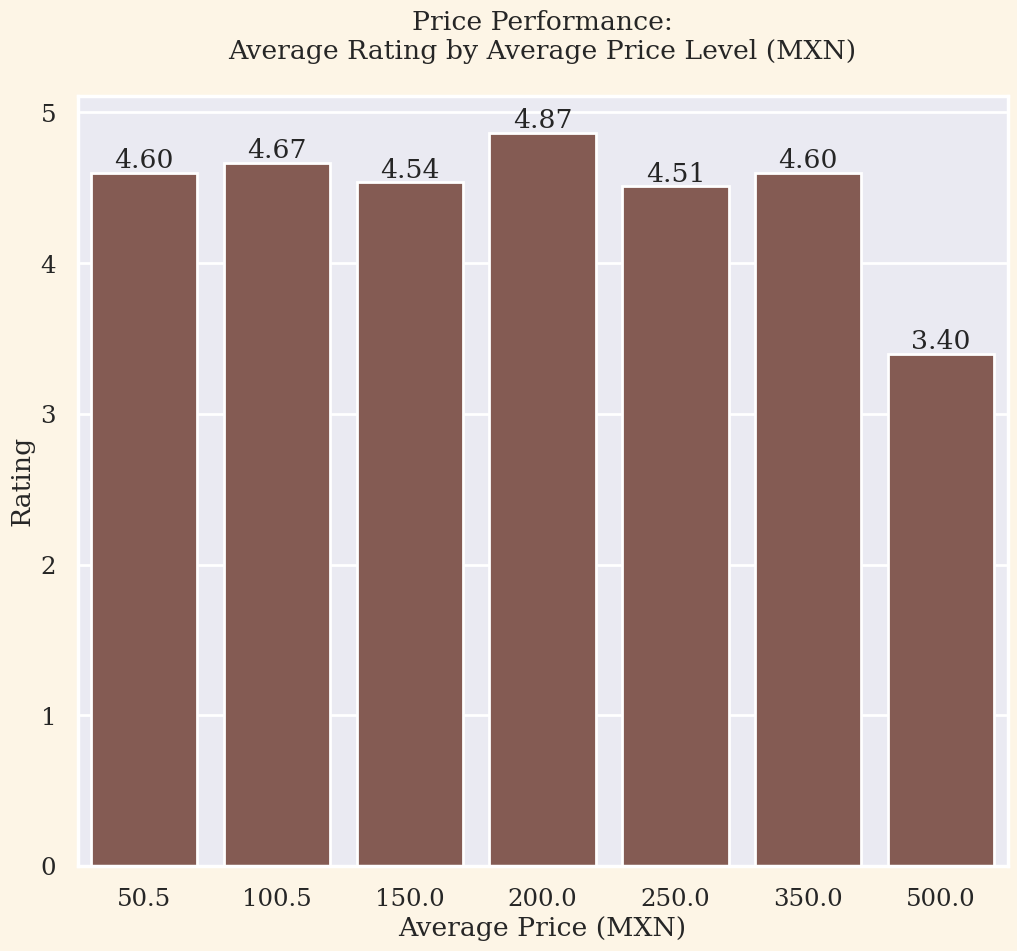

In [108]:
avgRating_vs_avgPrice = coffee_shops.groupby('avgPrice')['rating'].mean()

plt.figure(figsize=(12,10), facecolor='oldlace')
ax = sns.barplot(x=avgRating_vs_avgPrice.index, y=avgRating_vs_avgPrice.values, color='tab:brown')
plt.xlabel('Average Price (MXN)')
plt.ylabel('Rating')
plt.title('Price Performance:\nAverage Rating by Average Price Level (MXN)\n')


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')